In [2]:
using JuMP
using GLPK
#using Xpress
using LinearAlgebra,Cbc
using Plots
import Random

# Question 1

A hiker needs to decide which of the 5 items she should pack in her knapsack for a long hike. The utility of the items is 5, 3, 2, 7 and 4 respectively and their weight (in Kg) are 2, 8, 4, 2 and 5. She wants to maximise the utility of items in her knapsack, but she doesn't want to carry more than 10Kg in her knapsack. Which items should she take in her knapsack for the hike? 

Formulate a binary integer program for this problem, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints.

## Answer
 Let the ith item have a utility $u_i$ dollars and weight $w_i$ Kg. The hiker wants to select a subset with maximum utility, such that the summation of the weights of the selected items is less or equal to 10 Kg.
 
Considering a set of decision binary variables $𝑥_𝑖$ that receive value 1 if the $𝑖-th$ item is selected, and 0 if it is not selected, the resulting mathematical programming formulation is:

$$Maximise\ \sum_{i\in I}u_i.x_i$$
$$s.t.\ \sum_{i\in I}w_i.x_i \le W$$
$$x_i\in\{0,1\}\ \ \ \forall i\in I$$

In [3]:
using JuMP
import GLPK
import Test

profit = [5, 3, 2, 7, 4]
weight = [2, 8, 4, 2, 5]
capacity = 10
#model = Model(Xpress.Optimizer)
model = Model(GLPK.Optimizer)
@variable(model, x[1:5], Bin)
# Objective: maximize profit
@objective(model, Max, profit' * x)
# Constraint: can carry all
@constraint(model, weight' * x <= capacity)
# Solve problem using MIP solver
optimize!(model)

println("The best utility the hiker can get is: ", objective_value(model))
println("Solution is:")

for i in 1:5
    print("x[$i] = ", value(x[i]))
    println(", p[$i]/w[$i] = ", profit[i] / weight[i])
end



The best utility the hiker can get is: 16.0
Solution is:
x[1] = 1.0, p[1]/w[1] = 2.5
x[2] = 0.0, p[2]/w[2] = 0.375
x[3] = 0.0, p[3]/w[3] = 0.5
x[4] = 1.0, p[4]/w[4] = 3.5
x[5] = 1.0, p[5]/w[5] = 0.8


# Question 2
Let S = {1, 2, 3, 4, 5} and consider the following six subsets of S:
 $$S_1=\{1,2\}$$ $$S_2=\{1,3,5\}$$ $$S_3=\{2,4,5\}$$
 $$S_4=\{3\}$$ $$S_5=\{1\}$$ $$S_6\{4,5\}$$
 
A cover for S is a group of subsets from among these such that every element of S appears in at least one of the chosen subsets. (E.g., one cover would be $S_1,S_2$ and $S_3$). The problem is to find the cover for S with the fewest number of subsets. (This is an instance of what is known as the set covering problem.)

Formulate a binary integer program for this problem, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints.

## Answer:
Define variable $x_i$ for every set $S_i$, with the intended meaning that $x_i = 1$ when $S_i$ is selected, and $x_i = 0$ otherwise.
$$Minimise\ \ Z=\sum_{i=1}^{n}x_i$$
subject to:
$$\sum_{i:v\in S_i}x_i\ge 1 \ \forall{v\in S}$$
$$x_i\in\{0,1\}$$

In [4]:
#Set_Cover = Model(Xpress.Optimizer)
Set_Cover = Model(GLPK.Optimizer)
S=[1 2 3 4 5]     # Universal set
n=length(S)       # Number of variables in Universal set
m=6               # Number of subsets

# Defining a matrix n*m to determine which variable is in which subsets 
# S1=[1 2];S2=[1 3 5];S3=[2 4 5];S4=[3];S5=1;S6=[4 5]
y=[ 1 1 0 0 0;
    1 0 1 0 1;
    0 1 0 1 1;
    0 0 1 0 0;
    1 0 0 0 0;
    0 0 0 1 1]

# for every subset Si define x[i], x[i]=1 means Si is selected and x[i]=0 otherwise
@variable(Set_Cover, x[1:m],Bin )

for i in 1:n
    @constraint(Set_Cover, (dot(x,y[:,i]))>=1)
end

@objective(Set_Cover,Min,sum(x[i] for i=1:m))

optimize!(Set_Cover)
println("Objective value: ",objective_value(Set_Cover))
    subsets=Matrix{Float64}(undef, 1, m)
for i in 1:m
        subsets[i]=value(x[i])
end
println("Selected Subsets: ",subsets)
    

Objective value: 2.0
Selected Subsets: [0.0 1.0 1.0 0.0 0.0 0.0]


# Question 3

In the 𝑛-queens puzzle 𝑛 chess queens should to be placed in a board with 𝑛 × 𝑛 cells in a way that no queen can attack another, i.e., there must be at most one queen per row, column and diagonal. 

Consider a 8*8 chessboard that need to place 8 queens. Formulate a binary integer program for this problem, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints.

<table style="width:20%">
<tr><td height="20"> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td></tr>
<tr><td bgcolor="pink" height="20"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td></tr>
<tr><td height="20"> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td></tr>
<tr><td bgcolor="pink" height="20"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td></tr>
<tr><td height="20"> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td></tr>
<tr><td bgcolor="pink" height="20"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td></tr>
<tr><td height="20"> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td></tr>
<tr><td bgcolor="pink" height="20"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td></tr>
</table>

## Answer

This is a constraint satisfaction problem: any feasible solution is acceptable and no objective function is defined. The following binary programming formulation can be used to solve this problem:

$$\sum_{j=1}^{n}x_{ij} = 1 \ \ \ for\ i\in\{1,...,n\}$$
$$\sum_{i=1}^{n}x_{ij} = 1 \ \ \ for\ j\in\{1,...,n\}$$
$$\sum_{i=1}^{n}\sum_{j=1:i-j=k}^{n} x_{ij}\le 1\ \ \ \forall i\in\{1,...,n\},k\in\{2-n,...,n-2\}$$
$$\sum_{i=1}^{n}\sum_{j=1:i+j=k}^{n} x_{ij}\le 1\ \ \ \forall i\in\{1,...,n\},k\in\{3,...,n+n-1\}$$
$$x_{i,j}\in\{0,1\} \ \ \forall i\in\{1,...,n\},i\in\{1,...,n\}$$

In [5]:
using JuMP
import GLPK
import LinearAlgebra

N = 8
model = Model(GLPK.Optimizer)
@variable(model, x[1:N, 1:N], Bin)
for i in 1:N
    @constraint(model, sum(x[i, :]) == 1)
    @constraint(model, sum(x[:, i]) == 1)
end
for i in -(N - 1):(N-1)
    @constraint(model, sum(LinearAlgebra.diag(x, i)) <= 1)
    @constraint(model, sum(LinearAlgebra.diag(reverse(x, dims = 1), i)) <= 1)
end
optimize!(model)
solution = convert.(Int, value.(x))

8×8 Matrix{Int64}:
 0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  1
 0  1  0  0  0  0  0  0
 0  0  0  1  0  0  0  0
 1  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0
 0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0

## Question 4
We are given a set $M=\{1, \dots, m\}$ of clients and a set $N=\{ 1, \dots, n\}$ of sites where a facility can be built. We want to decide on which of the sites we should open the facility such that the total cost of serving all the clients plus the fixed cost of building a facility is minimised. Each client is served by its closest open facility and the cost of serving the client is equal to the Euclidean distance between the client and its serving facility. The cost of building any facility is $f_j = 1\ \  \forall\ \  j$. Obviously, a facility site can't serve a client if it is not open.

Use the locations of the clients and facilities from the below generator tool for this exercise.

Formulate a binary integer program for this problem, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints. Plot the clients, open facilities and which client is being served by which facility.

In [6]:
Random.seed!(314)

# number of clients
m = 12
# number of facility locations
n = 5

# Clients' locations
Xc = rand(m)
Yc = rand(m)

# Facilities' potential locations
Xf = rand(n)
Yf = rand(n)

# Fixed costs
f = ones(n);

# Distance
c = zeros(m, n)
for i in 1:m
    for j in 1:n
        c[i, j] = LinearAlgebra.norm([Xc[i] - Xf[j], Yc[i] - Yf[j]], 2)
    end
end

Display the data

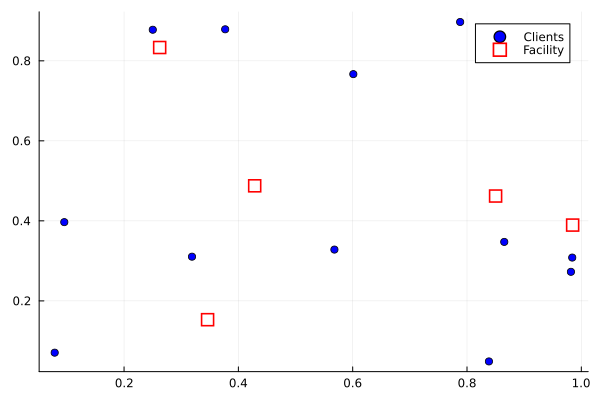

In [7]:
Plots.scatter(
    Xc,
    Yc,
    label = "Clients",
    markershape = :circle,
    markercolor = :blue,
)
Plots.scatter!(
    Xf,
    Yf,
    label = "Facility",
    markershape = :square,
    markercolor = :white,
    markersize = 6,
    markerstrokecolor = :red,
    markerstrokewidth = 2,
)

In [8]:
ufl = Model(GLPK.Optimizer)
@variable(ufl, y[1:n], Bin);
@variable(ufl, x[1:m, 1:n], Bin);

@constraint(ufl, client_service[i in 1:m], sum(x[i, j] for j in 1:n) == 1);

@constraint(ufl, open_facility[i in 1:m, j in 1:n], x[i, j] <= y[j]);

@objective(ufl, Min, f'y + sum(c .* x));

optimize!(ufl)
println("Optimal value: ", objective_value(ufl))

Optimal value: 5.701839454572419


Visualising the solution

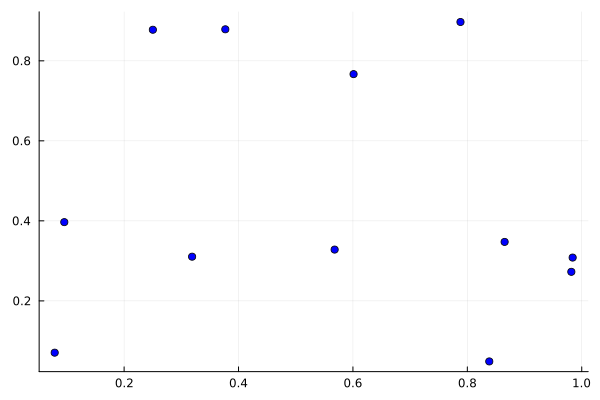

In [9]:
x_ = value.(x) .> 1 - 1e-5
y_ = value.(y) .> 1 - 1e-5
p = Plots.scatter(
    Xc,
    Yc,
    markershape = :circle,
    markercolor = :blue,
    label = nothing,
)

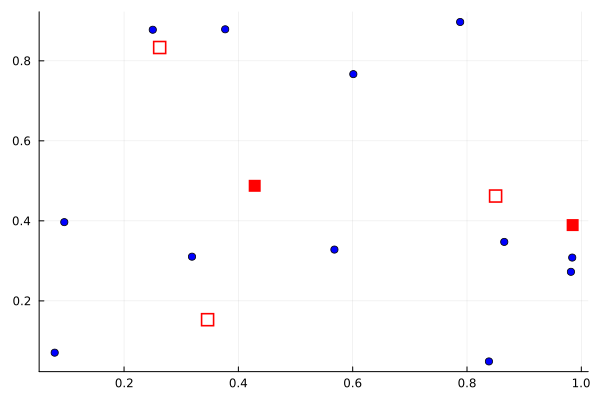

In [10]:
mc = [(y_[j] ? :red : :white) for j in 1:n]
Plots.scatter!(
    Xf,
    Yf,
    markershape = :square,
    markercolor = mc,
    markersize = 6,
    markerstrokecolor = :red,
    markerstrokewidth = 2,
    label = nothing,
)

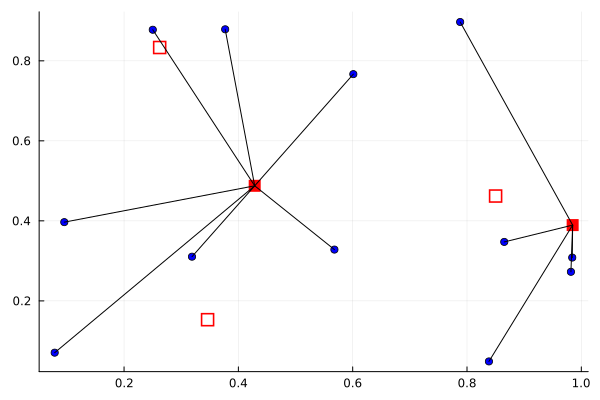

In [11]:
for i in 1:m
    for j in 1:n
        if x_[i, j] == 1
            Plots.plot!(
                [Xc[i], Xf[j]],
                [Yc[i], Yf[j]],
                color = :black,
                label = nothing,
            )
        end
    end
end

p

## Question 5
Consider the Petersen graph below:

You want to check the hypothesis that this graph can be 3-coloured.Formulate a binary integer program to check the hypothesis, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints. Solve it using Julia/JuMP and answer the hypothesis one way or other.

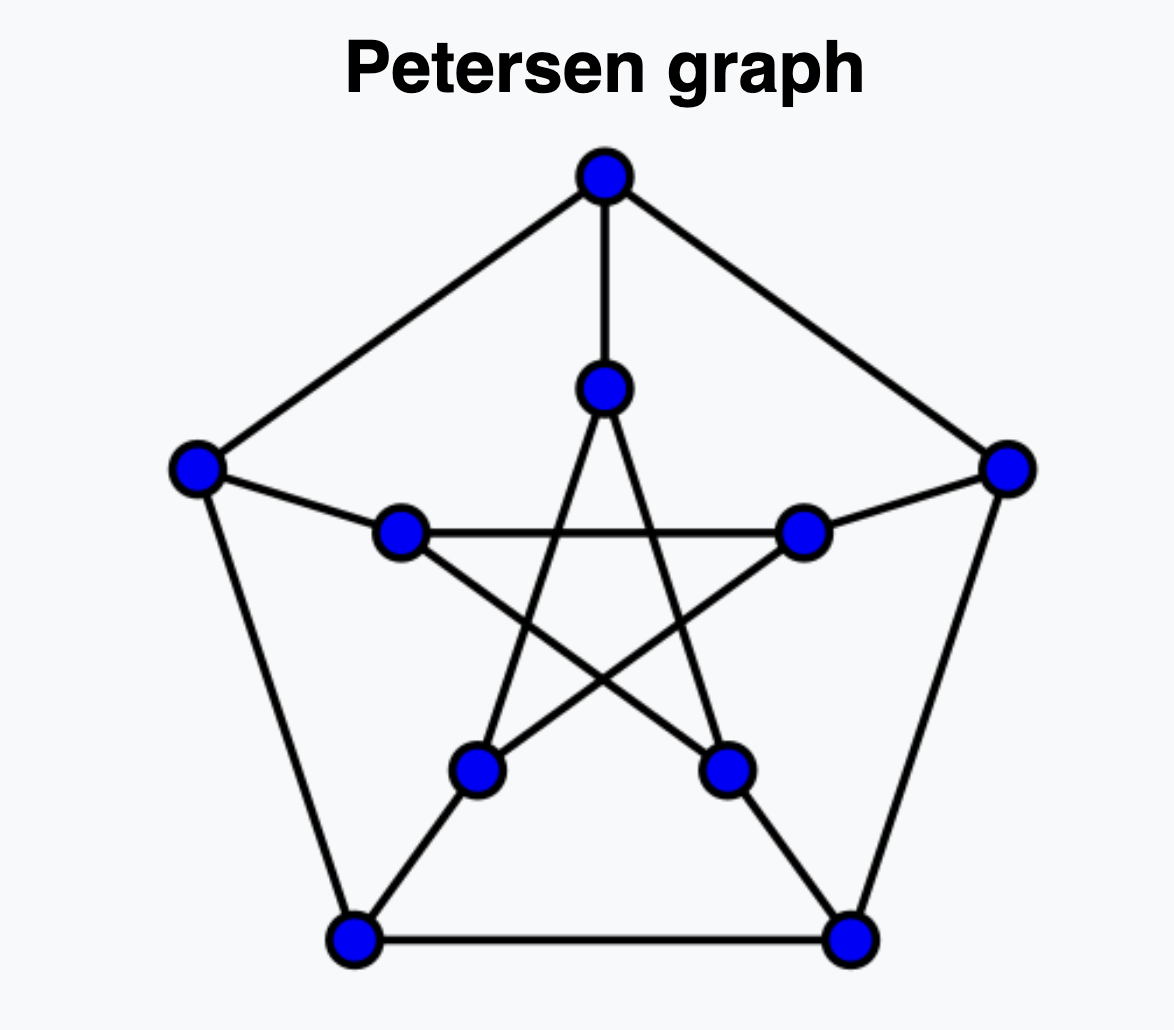

## Answer

This is a constraint satisfaction problem: any feasible solution is acceptable and no objective function is defined. The following binary programming formulation can be used to solve this problem:

For each node i there are 3 variables x_ir,x_ib and x_ig with x_ir=1 if node i is coloured red, x_ir=0 if node i is not coloured red (and similarly for blue, green). There will be $3 |E|$ decision variables for a graph $G=(V,E)$

$$Maximise\ \ 0$$
subject to:
$$x_{ir} + x_{ib} + x_{ig} = 1 \ \ \ \ \ \forall{v\in V}$$
$$x_{ir} + x_{jr} \leq 1\ \ \ \ \ \forall{\{i,j\} \in E}$$
$$x_{ib} + x_{jb} \leq 1\ \ \ \ \ \forall{\{i,j\} \in E}$$
$$x_{ig} + x_{jg} \leq 1\ \ \ \ \ \forall{\{i,j\} \in E}$$
$$x_{ir}, x_{ib}, x_{ig} \in\{0,1\}$$

The final graph may look as follows:
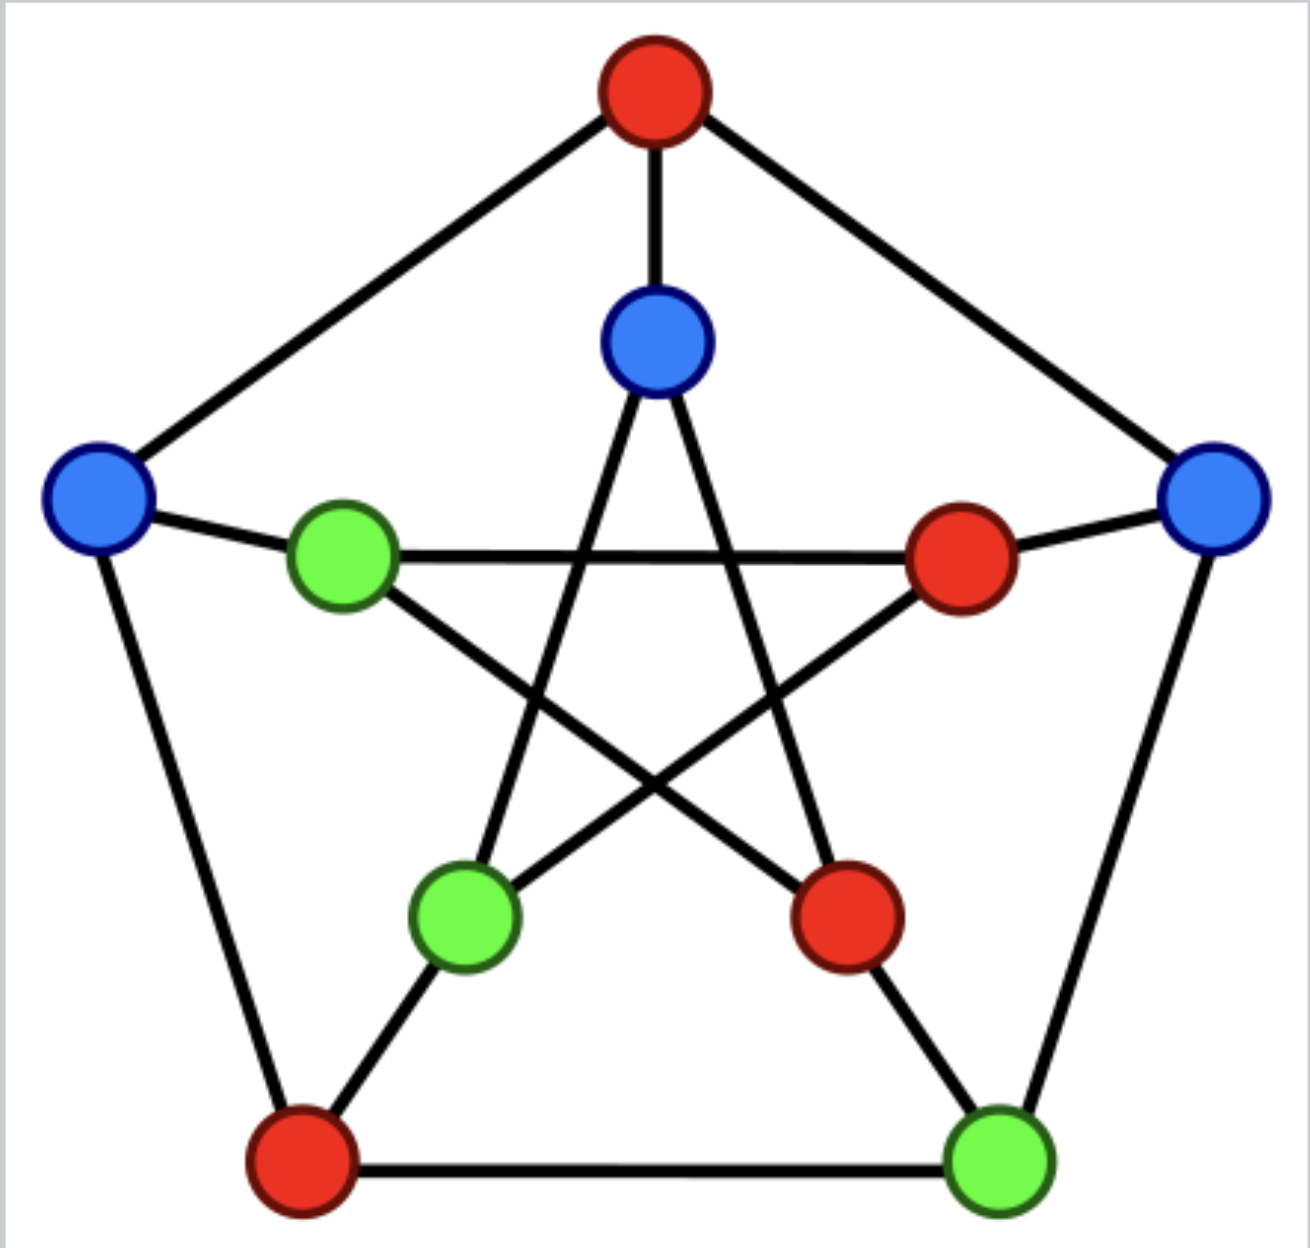

In [35]:
E = [(1,2),(1,3),(1,4),(2,5),(2,9),(3,6),(3,10),(7,9),(9,10),(8,10),(4,7),(4,8),(5,6),(5,8),(6,7)] #edge index
n = 10 #10 nodes

pg = Model(GLPK.Optimizer)
#x[i] is 1 if node i belongs to color x
@variable(pg, xr[1:n], Bin); #red
@variable(pg, xb[1:n], Bin); #blue
@variable(pg, xg[1:n], Bin); #green

#every node must have a color
@constraint(pg, c1[i in 1:n], xr[i]+xb[i]+xg[i] == 1);

#adjacent nodes cannot have the same color
@constraint(pg, c2[(i,j) in E], xr[i] + xr[j] <= 1)
@constraint(pg, c3[(i,j) in E], xb[i] + xb[j] <= 1)
@constraint(pg, c4[(i,j) in E], xg[i] + xg[j] <= 1)

optimize!(pg)
if(termination_status(pg)==MOI.OPTIMAL)
    println("The Peterson graph is 3-colourable")
else
    println("The Peterson graph is not 3-colourable")
end

The Peterson graph is 3-colourable
